<a href="https://colab.research.google.com/github/JuanBustamante107517/Lab_08_Bustamante_G/blob/main/Lab_05_bustamante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [6]:
import zipfile
import os
import pandas as pd
from ucimlrepo import fetch_ucirepo

### a. Por medio de la librería 'Pandas', lea la base de datos, separe las variables numéricas de las no numéricas tomando en cuenta la información que se encuentra en el repositorio, calcule sus estadísticos descriptivos y halle la matriz de correlación.

In [7]:
# Cargar dataset desde la librería
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

In [8]:
# Separar datos
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Unir X e y para tener un único DataFrame como en el original
df = pd.concat([X, y], axis=1)

In [9]:
# Revisar nombres de columnas
print("Columnas del dataset:", df.columns.tolist())

# Verificar valores únicos en las columnas (por si hay valores '?')
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

# Convertir columnas a numéricas si es necesario
# (ucimlrepo generalmente ya limpia los datos, pero igual verificamos)
df = df.apply(pd.to_numeric, errors='coerce')

# Separar variables numéricas y no numéricas
numeric_vars = df.select_dtypes(include='number')
non_numeric_vars = df.select_dtypes(exclude='number')

print("Variables numéricas:", numeric_vars.columns.tolist())
print("Variables no numéricas:", non_numeric_vars.columns.tolist())

# Estadísticos descriptivos
print("Estadísticos descriptivos:")
print(numeric_vars.describe())

# Matriz de correlación
print("Matriz de correlación:")
print(numeric_vars.corr())

Columnas del dataset: ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']
Clump_thickness: [ 5  3  6  4  8  1  2  7 10  9]
Uniformity_of_cell_size: [ 1  4  8 10  2  3  7  5  6  9]
Uniformity_of_cell_shape: [ 1  4  8 10  2  3  5  6  7  9]
Marginal_adhesion: [ 1  5  3  8 10  4  6  2  9  7]
Single_epithelial_cell_size: [ 2  7  3  1  6  4  5  8 10  9]
Bare_nuclei: [ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]
Bland_chromatin: [ 3  9  1  2  4  5  7  8  6 10]
Normal_nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
Mitoses: [ 1  5  4  2  3  7 10  8  6]
Class: [2 4]
Variables numéricas: ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']
Variables no numéricas: []
Estadísticos descriptivos:
       Clump_thickn

### b.Por medio de la librería 'Matplotlib', elabore histogramas, gráficos de densidad, box plot y diagramas de dispersión incluyendo diversos parámetros para estos.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

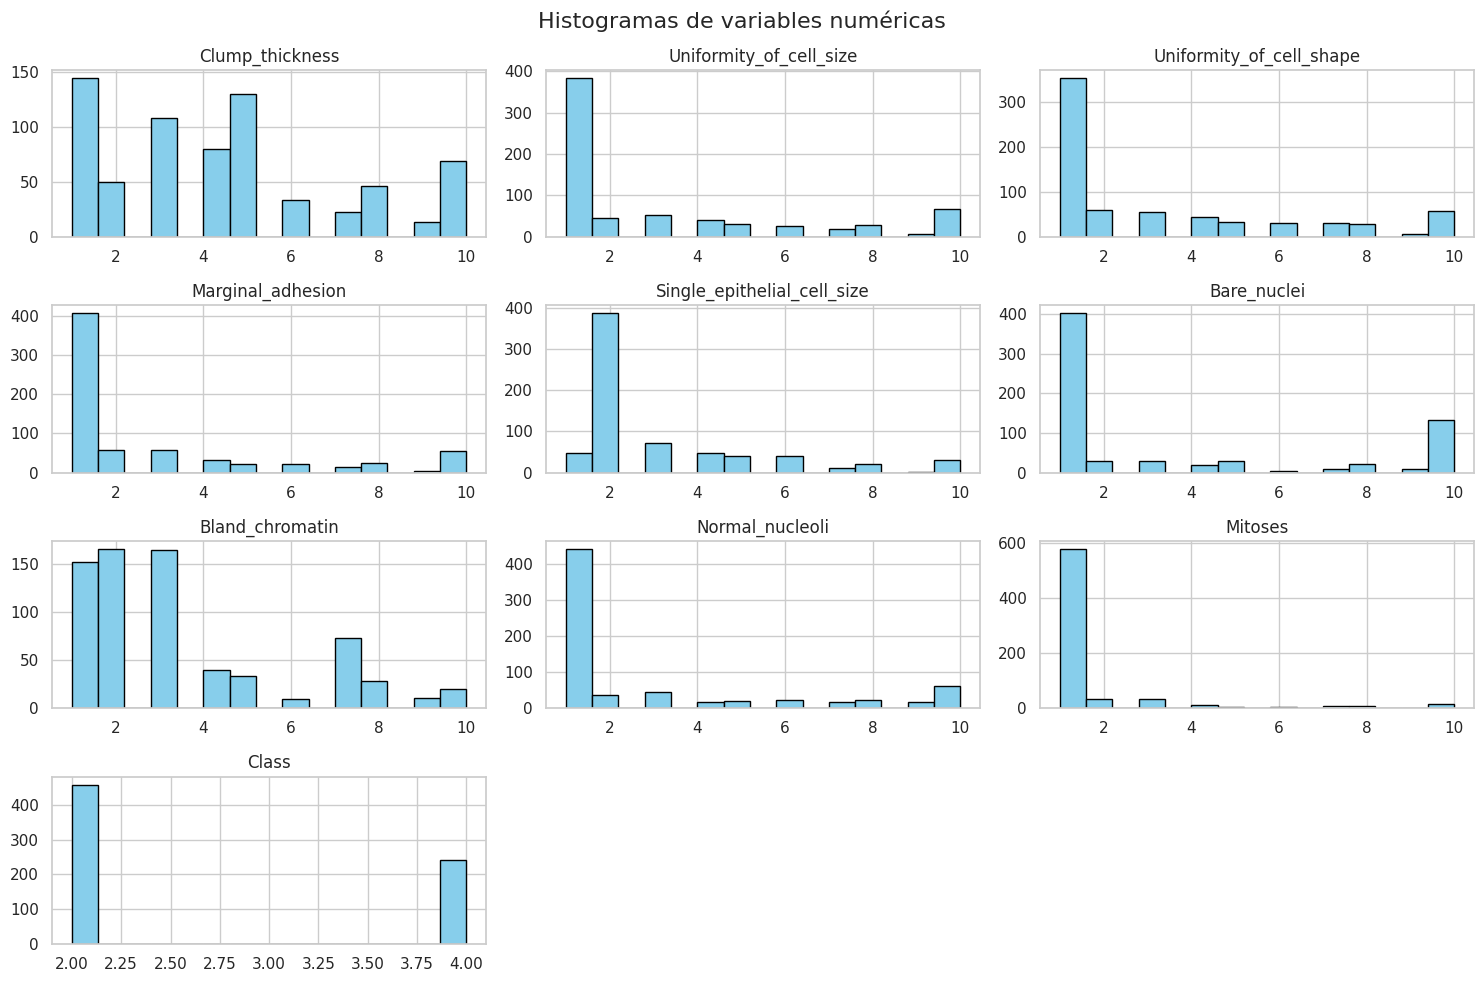

In [11]:
# Estilo de gráficos
sns.set(style="whitegrid")

# Histogramas
numeric_vars.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

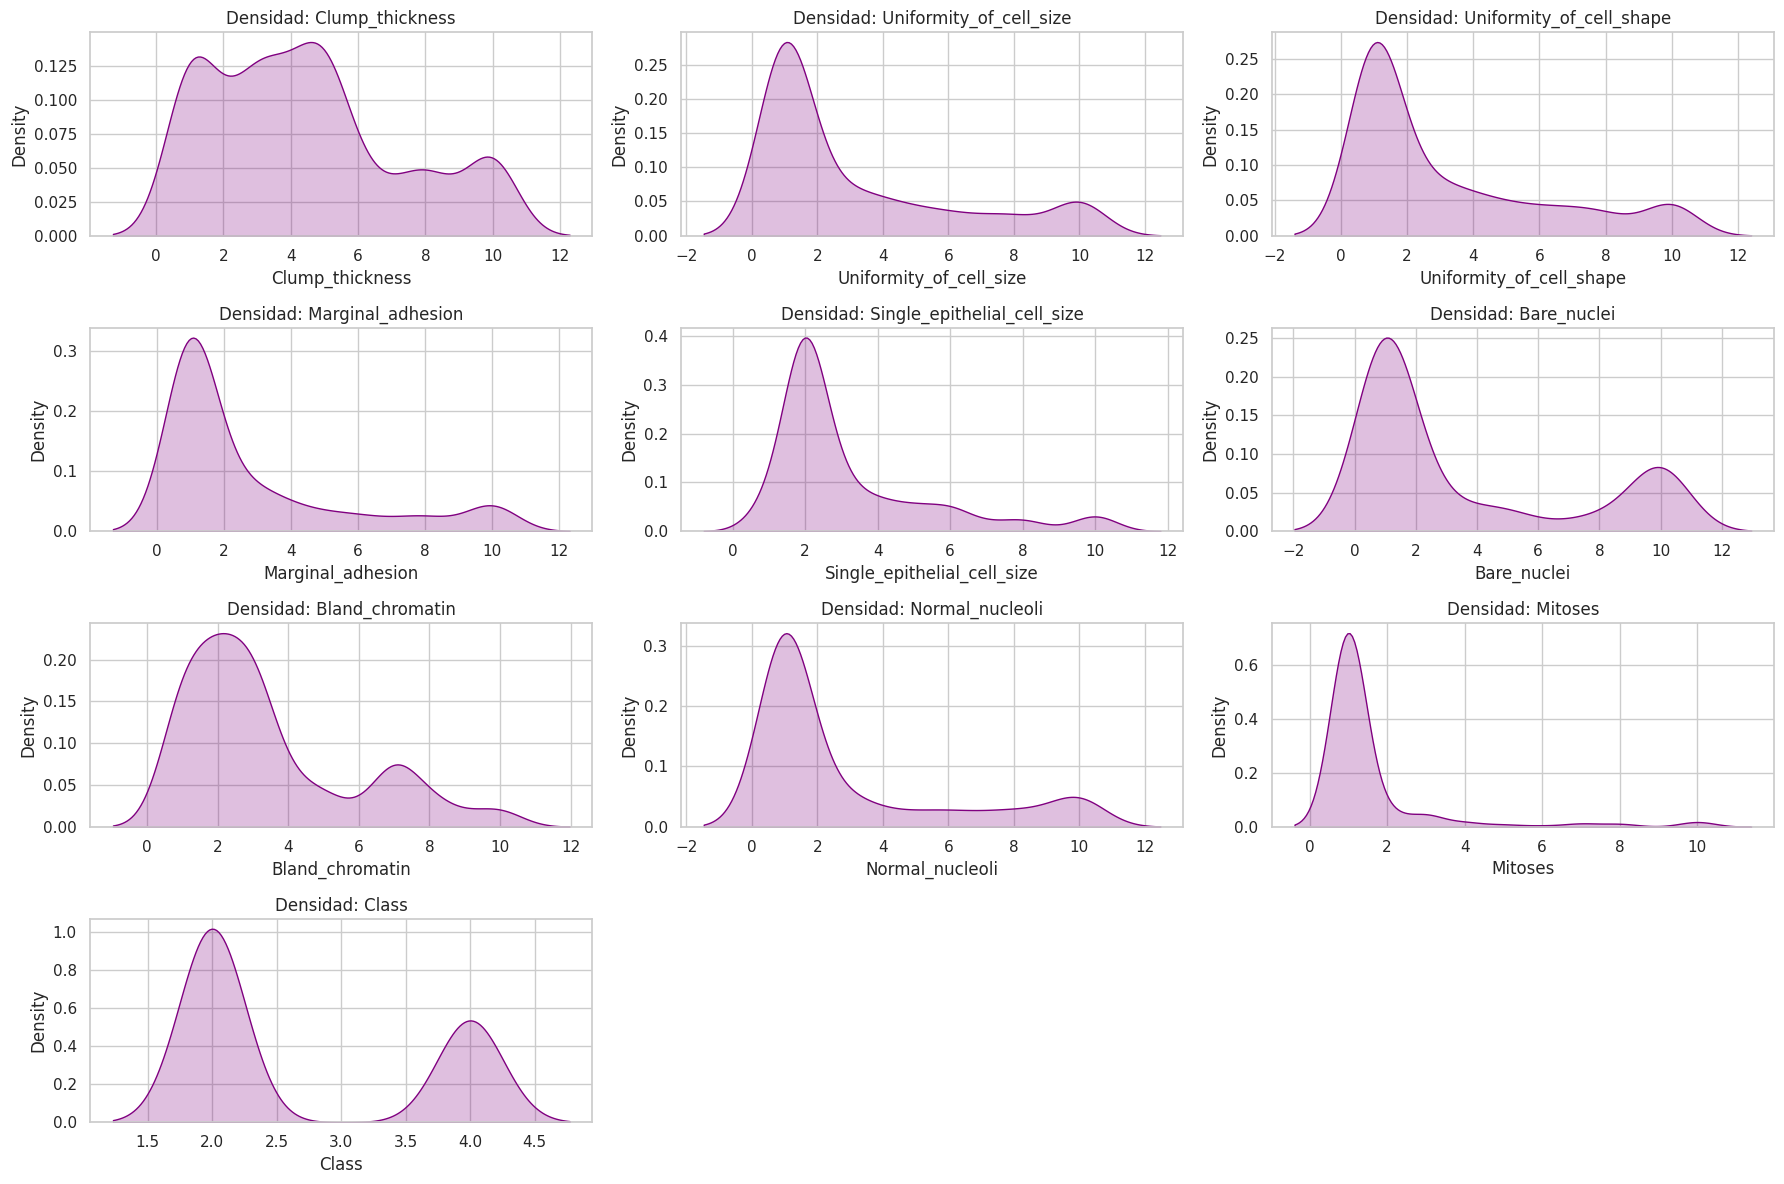

In [12]:
# Gráficos de densidad
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_vars.columns):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data=numeric_vars[column], fill=True, color='purple')
    plt.title(f'Densidad: {column}')
plt.tight_layout()
plt.show()

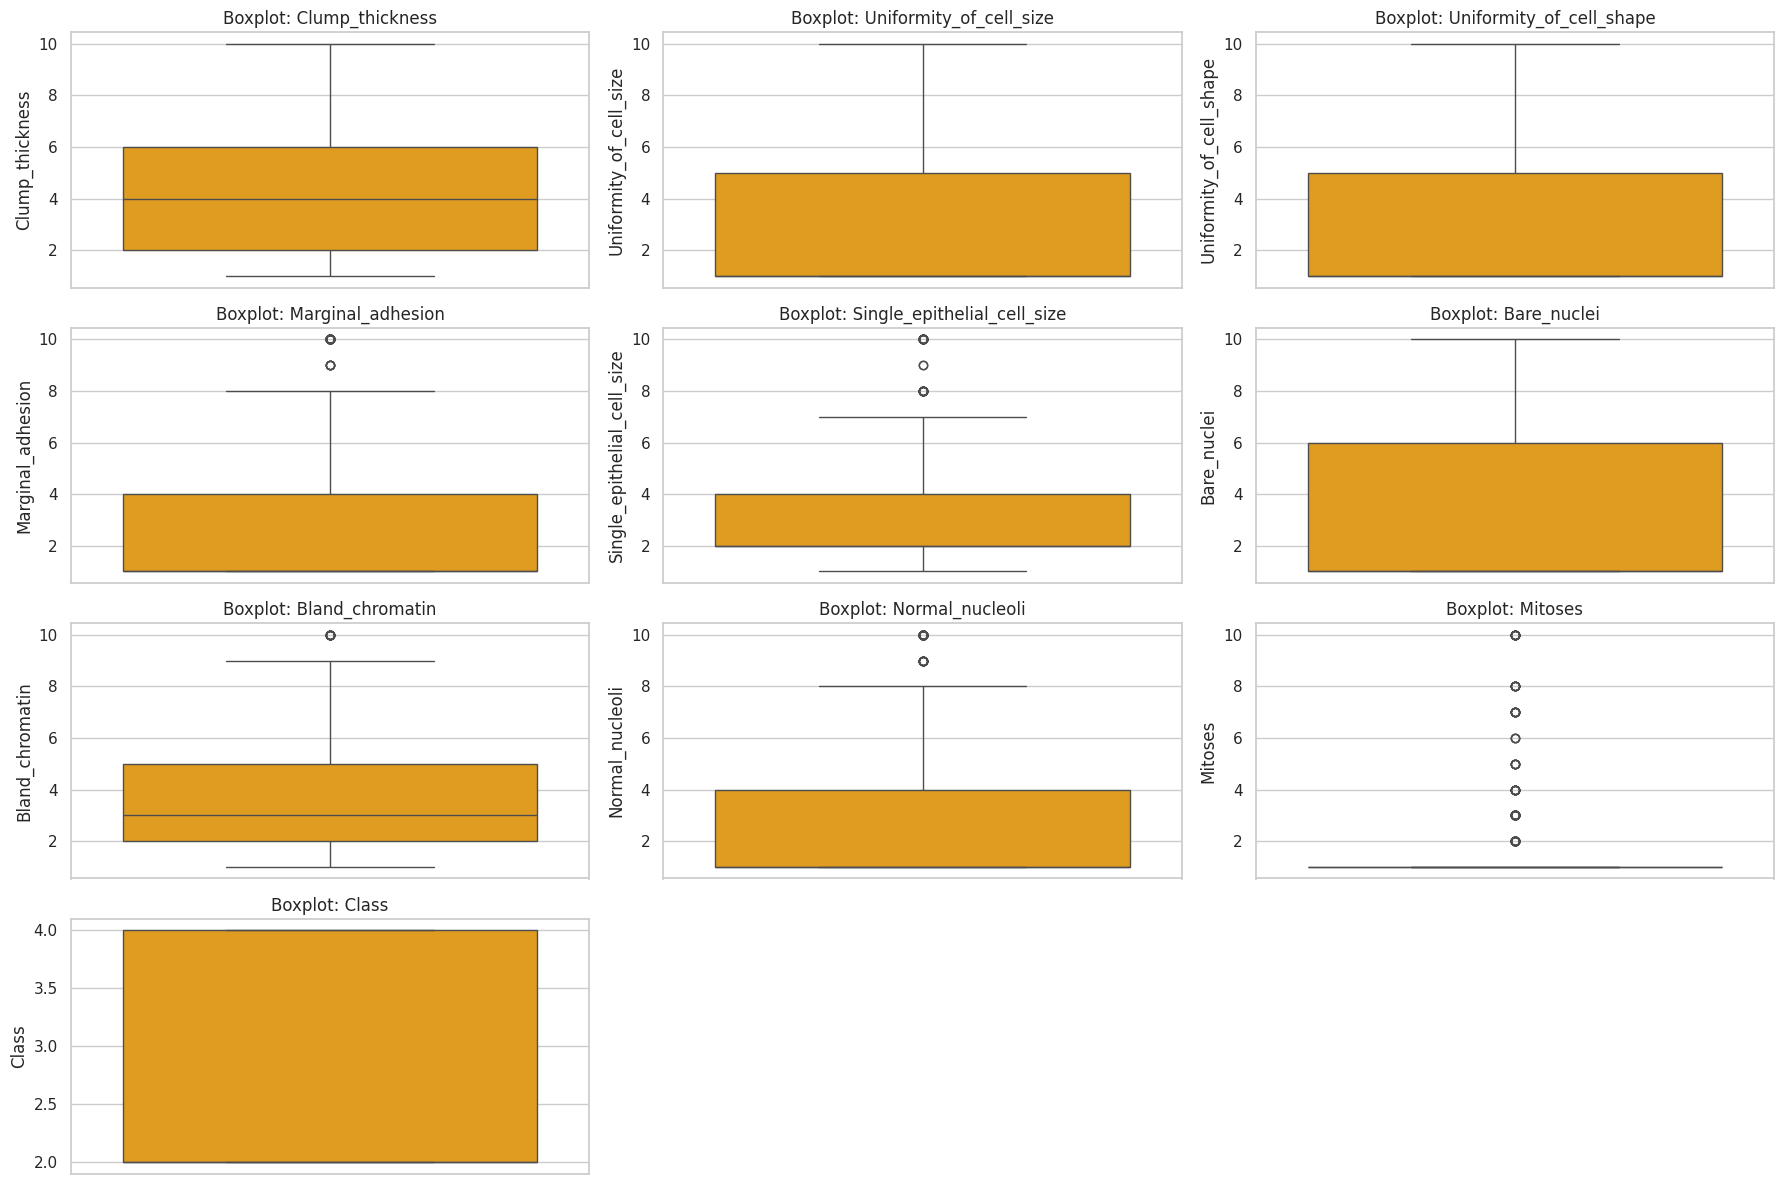

In [13]:
# Boxplots
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_vars.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=numeric_vars[column], color='orange')
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.show()

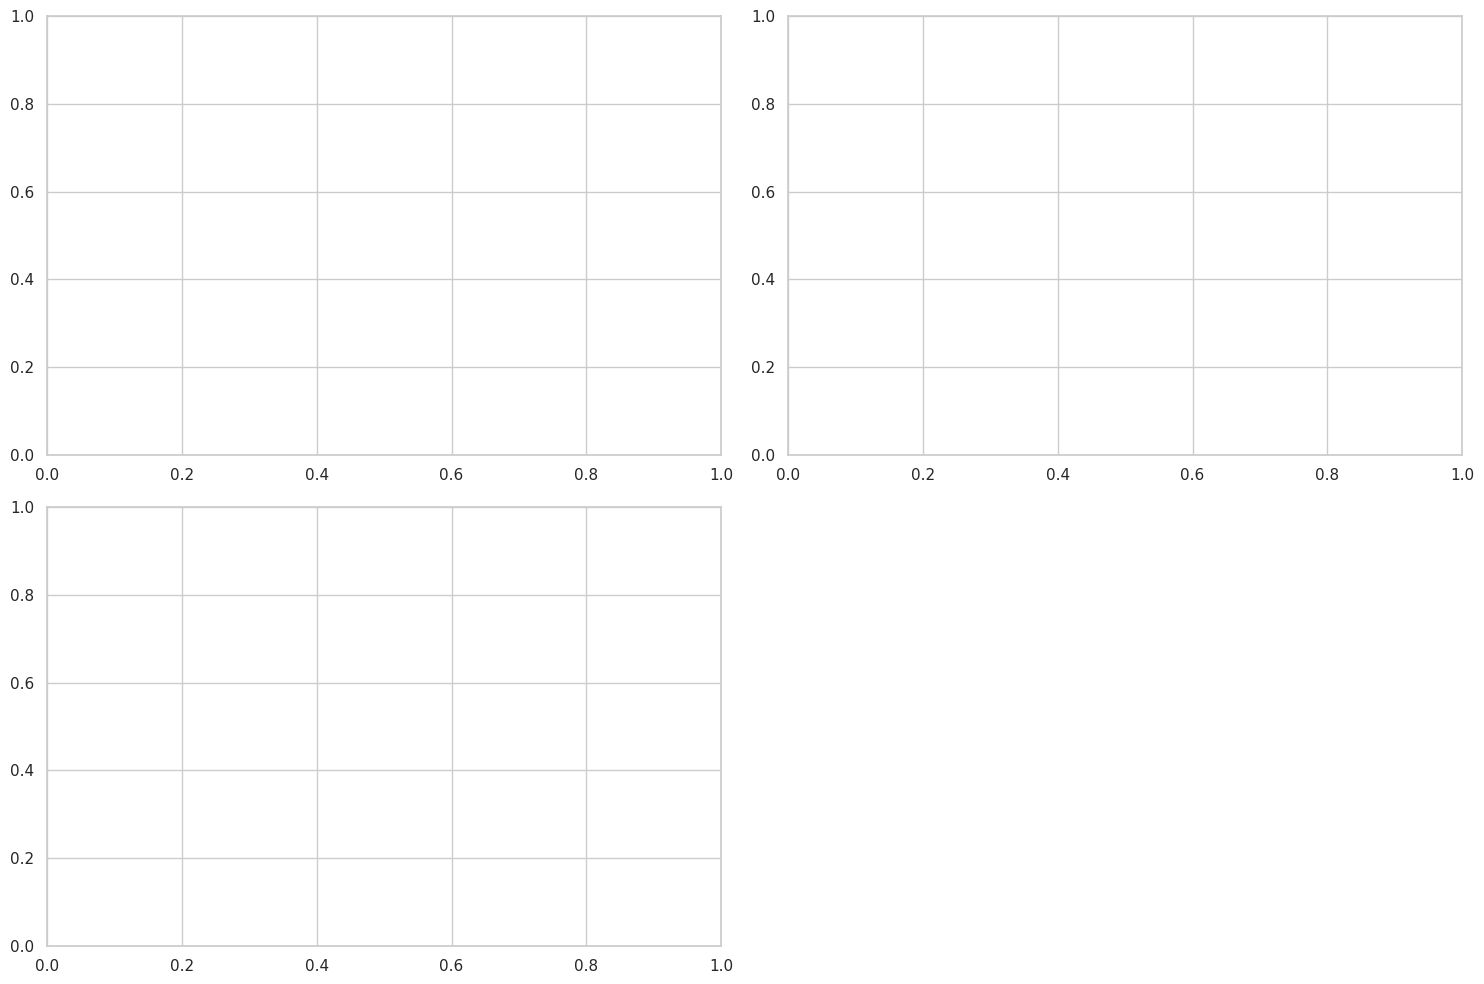

In [14]:
# Diagramas de dispersión (scatter plots)
# Asegúrate de que las columnas existan en el DataFrame
scatter_vars = ['Uniformity_of_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin']

plt.figure(figsize=(15, 10))
for i, column in enumerate(scatter_vars):
    plt.subplot(2, 2, i + 1)
    if 'Clump_Thickness' in df.columns and column in df.columns:
        sns.scatterplot(data=df, x='Clump_Thickness', y=column, hue='Class', palette='Set1')
        plt.title(f'Dispersión: Clump Thickness vs {column}')
        plt.legend(title='Class')

plt.tight_layout()
plt.show()

### c. Utilice la librería 'Scikit-learn' para separar la información en datos de entrenamiento y prueba. Además, implemente un modelo k-NN con dicha información, realice pronósticos y mida la precisión para los datos de entrenamiento y prueba.


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
# 1. Unir features y target para formar un solo DataFrame (como en el ejemplo de tu amigo)
df = pd.concat([X, y], axis=1)

In [17]:
# 2. Reemplazar '?' por NaN si existieran (en tu caso ya debe estar como NaN desde ucimlrepo, pero se asegura)
df.replace('?', np.nan, inplace=True)


In [18]:
# 3. Eliminar filas con valores faltantes
df_clean = df.dropna()

In [19]:
# 4. Eliminar columna de ID si existe (en tu caso puede ser 'Sample_code_number' o algo similar)
if 'Sample_code_number' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Sample_code_number'])

In [20]:
# 5. Separar en X (features) e y (target)
X_clean = df_clean.drop(columns='Class')
y_clean = df_clean['Class']

In [21]:
# 6. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [22]:
# 7. Modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# 8. Predicciones
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [24]:
# 9. Precisión
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en entrenamiento: {acc_train:.4f}")
print(f"Precisión en prueba: {acc_test:.4f}")

Precisión en entrenamiento: 0.9744
Precisión en prueba: 0.9489
